In [ ]:
!find /content -name "benign" -type d

/content/final_dataset/train/benign
/content/final_dataset/test/benign
/content/final_dataset/val/benign
/content/drive/MyDrive/data/train/benign
/content/drive/MyDrive/data/test/benign
/content/drive/MyDrive/data/valid/benign
/content/drive/.Encrypted/MyDrive/data/train/benign
/content/drive/.Encrypted/MyDrive/data/test/benign
/content/drive/.Encrypted/MyDrive/data/valid/benign


In [ ]:
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Drive'ı bağla
from google.colab import drive
drive.mount('/content/drive')

# Ana yollar
base_dir = "/content/final_dataset"
for split in ['train', 'test', 'val']:
    for cls in ['benign', 'malignant', 'normal']:
        os.makedirs(os.path.join(base_dir, split, cls), exist_ok=True)

print("✅ Klasör yapısı oluşturuldu.")

KeyboardInterrupt: 

In [ ]:
# Drive'ı bağla
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Drive'ı bağla
from google.colab import drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

project_path = "/content/drive/MyDrive/Ara Proje"
zips = ["dataset_b.zip", "bus_uclm_separated.zip"]

print("🔍 Zip İçerik Kontrolü Başladı...\n")

for zip_name in zips:
    zip_full_path = os.path.join(project_path, zip_name)

    if os.path.exists(zip_full_path):
        print(f"📦 Dosya: {zip_name}")
        with zipfile.ZipFile(zip_full_path, 'r') as z:
            # Klasör yapısını anlamak için tüm dosya yollarını al
            namelist = z.namelist()

            # Ana klasörleri tespit et (klasör olan ve sonu / ile bitenler)
            # Ya da dosya yollarındaki ilk 2 seviyeyi kontrol et
            folders = sorted(list(set([os.path.dirname(x) for x in namelist if '/' in x])))

            print(f"   📂 Tespit Edilen Klasör Yapısı:")
            for folder in folders[:15]: # Çok uzunsa ilk 15'i yazdır
                print(f"    - {folder}")

            if len(folders) > 15:
                print(f"    - ... ({len(folders)-15} klasör daha var)")
        print("-" * 30)
    else:
        print(f"❌ HATA: {zip_name} Ara Proje klasöründe bulunamadı!")

🔍 Zip İçerik Kontrolü Başladı...

📦 Dosya: dataset_b.zip
   📂 Tespit Edilen Klasör Yapısı:
    - dataset_b
    - dataset_b/benign
    - dataset_b/malignant
------------------------------
📦 Dosya: bus_uclm_separated.zip
   📂 Tespit Edilen Klasör Yapısı:
    - bus_uclm_separated
    - bus_uclm_separated/benign
    - bus_uclm_separated/malign
    - bus_uclm_separated/normal
------------------------------


In [ ]:
import os
import shutil
import random
import zipfile

# 1. Drive'ı Bağla
from google.colab import drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# 2. Klasörleri Hazırla
base_dir = "/content/final_dataset"
if os.path.exists(base_dir): shutil.rmtree(base_dir)

for split in ['train', 'test', 'val']:
    for cls in ['benign', 'malignant', 'normal']:
        os.makedirs(os.path.join(base_dir, split, cls), exist_ok=True)

# 3. Zipleri Colab Yereline Aç (Hız için)
project_path = "/content/drive/MyDrive/Ara Proje"
!unzip -q "{project_path}/dataset_b.zip" -d /content/udiat_raw
!unzip -q "{project_path}/bus_uclm_separated.zip" -d /content/uclm_raw

def move_and_split(src_path, cls_dest_name, train_p=0.7, val_p=0.15):
    if not os.path.exists(src_path): return
    files = [f for f in os.listdir(src_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(files)

    n = len(files)
    tr_idx = int(n * train_p)
    vl_idx = int(n * (train_p + val_p))

    for i, f in enumerate(files):
        if i < tr_idx: split = 'train'
        elif i < vl_idx: split = 'val'
        else: split = 'test'
        shutil.copy(os.path.join(src_path, f), os.path.join(base_dir, split, cls_dest_name, f"src_{cls_dest_name}_{f}"))

# 4. DOSYALARI TOPLA (Tam konumlarla)
# UDIAT
move_and_split("/content/udiat_raw/dataset_b/benign", "benign")
move_and_split("/content/udiat_raw/dataset_b/malignant", "malignant")

# UCLM
move_and_split("/content/uclm_raw/bus_uclm_separated/benign", "benign")
move_and_split("/content/uclm_raw/bus_uclm_separated/malign", "malignant") # malign -> malignant birleşti
move_and_split("/content/uclm_raw/bus_uclm_separated/normal", "normal")

print("✅ Veriler dürüstçe (Train/Test/Val) olarak dağıtıldı.")

✅ Veriler dürüstçe (Train/Test/Val) olarak dağıtıldı.


In [ ]:
import os

base_dir = "/content/final_dataset"

def check_splits(directory):
    splits = ['train', 'val', 'test']
    classes = ['benign', 'malignant', 'normal']

    print(f"{'SET':<10} | {'BENIGN':<10} | {'MALIGNANT':<10} | {'NORMAL':<10} | {'TOPLAM':<10}")
    print("-" * 65)

    grand_total = 0
    for s in splits:
        counts = []
        for c in classes:
            path = os.path.join(directory, s, c)
            counts.append(len(os.listdir(path)))

        row_total = sum(counts)
        grand_total += row_total
        print(f"{s.upper():<10} | {counts[0]:<10} | {counts[1]:<10} | {counts[2]:<10} | {row_total:<10}")

    print("-" * 65)
    print(f"{'GENEL TOPLAM':<49} | {grand_total:<10}")

check_splits(base_dir)

SET        | BENIGN     | MALIGNANT  | NORMAL     | TOPLAM    
-----------------------------------------------------------------


FileNotFoundError: [Errno 2] No such file or directory: '/content/final_dataset/train/benign'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

# Augmentasyon ayarları
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

base_dir = "/content/final_dataset"

for cls in ['benign', 'malignant', 'normal']:
    train_path = os.path.join(base_dir, 'train', cls)
    # Sadece orijinal resimleri listele (aug_ ile başlamayanlar)
    files = [f for f in os.listdir(train_path) if not f.startswith('aug')]

    print(f"🔄 {cls.upper()} Train seti katlanıyor (Orijinal: {len(files)} resim)...")

    for filename in files:
        img_path = os.path.join(train_path, filename)
        try:
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)

            # Her bir resimden 4 varyasyon üretip aynı klasöre kaydet
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=train_path,
                                      save_prefix='aug', save_format='jpeg'):
                i += 1
                if i >= 4: # Orijinal + 4 kopya = 5x veri
                    break
        except Exception as e:
            print(f"❌ {filename} işlenirken hata oluştu: {e}")

print("\n✅ Fiziksel Augmentation başarıyla tamamlandı!")






# 1. Klasörü Ziple
print("📦 Zipleme işlemi başlıyor (Bu biraz sürebilir)...")
!zip -r /content/MEME_ULTRA_FINAL_DATASET.zip /content/final_dataset

# 2. Drive'daki Ara Proje klasörüne kopyala
import shutil
dest_path = "/content/drive/MyDrive/Ara Proje/MEME_ULTRA_FINAL_DATASET.zip"
shutil.copy("/content/MEME_ULTRA_FINAL_DATASET.zip", dest_path)

print(f"🚀 İŞLEM TAMAM! Dev veri setin şuraya kaydedildi: {dest_path}")

🔄 BENIGN Train seti katlanıyor (Orijinal: 197 resim)...
🔄 MALIGNANT Train seti katlanıyor (Orijinal: 99 resim)...
🔄 NORMAL Train seti katlanıyor (Orijinal: 293 resim)...

✅ Fiziksel Augmentation başarıyla tamamlandı!
📦 Zipleme işlemi başlıyor (Bu biraz sürebilir)...
  adding: content/final_dataset/ (stored 0%)
  adding: content/final_dataset/train/ (stored 0%)
  adding: content/final_dataset/train/malignant/ (stored 0%)
  adding: content/final_dataset/train/malignant/aug_0_5340.jpeg (deflated 1%)
  adding: content/final_dataset/train/malignant/aug_0_1895.jpeg (deflated 1%)
  adding: content/final_dataset/train/malignant/aug_0_5911.jpeg (deflated 1%)
  adding: content/final_dataset/train/malignant/aug_0_7295.jpeg (deflated 1%)
  adding: content/final_dataset/train/malignant/aug_0_79.jpeg (deflated 0%)
  adding: content/final_dataset/train/malignant/aug_0_9159.jpeg (deflated 1%)
  adding: content/final_dataset/train/malignant/aug_0_1471.jpeg (deflated 1%)
  adding: content/final_dataset/

In [ ]:
import os

zip_path = "/content/drive/MyDrive/Ara Proje/MEME_ULTRA_FINAL_DATASET.zip"

if os.path.exists(zip_path):
    size_bytes = os.path.getsize(zip_path)
    size_mb = size_bytes / (1024 * 1024)
    print(f"✅ Dosya Bulundu: {zip_path}")
    print(f"📦 Dosya Boyutu: {size_mb:.2f} MB")

    if size_mb > 10: # Basit bir alt sınır kontrolü
        print("\n🚀 Veri setin artık 'Ölümsüz'. İstediğin zaman bu zipi açıp eğitime başlayabiliriz.")
    else:
        print("\n⚠️ Uyarı: Dosya boyutu beklenenden küçük görünüyor, içeriği kontrol etmekte fayda var.")
else:
    print(f"❌ HATA: Dosya belirtilen yolda bulunamadı!")

✅ Dosya Bulundu: /content/drive/MyDrive/Ara Proje/MEME_ULTRA_FINAL_DATASET.zip
📦 Dosya Boyutu: 441.42 MB

🚀 Veri setin artık 'Ölümsüz'. İstediğin zaman bu zipi açıp eğitime başlayabiliriz.


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/Ara Proje/MEME_ULTRA_FINAL_DATASET.zip"
counts = {
    'train': {'benign': 0, 'malignant': 0, 'normal': 0},
    'val': {'benign': 0, 'malignant': 0, 'normal': 0},
    'test': {'benign': 0, 'malignant': 0, 'normal': 0}
}

print("📊 Zip içeriği analiz ediliyor...")

with zipfile.ZipFile(zip_path, 'r') as z:
    for name in z.namelist():
        # Klasör değil, dosya olduğundan emin ol
        if not name.endswith('/'):
            parts = name.split('/')
            # Yolun içinde split ve class isimlerini ara
            current_split = None
            current_class = None

            for s in ['train', 'val', 'test']:
                if s in parts:
                    current_split = s
                    break

            for c in ['benign', 'malignant', 'normal']:
                if c in parts:
                    current_class = c
                    break

            if current_split and current_class:
                counts[current_split][current_class] += 1

# Tabloyu yazdır
print(f"\n{'SET':<10} | {'BENIGN':<10} | {'MALIGNANT':<10} | {'NORMAL':<10} | {'TOPLAM':<10}")
print("-" * 65)

for s in ['train', 'val', 'test']:
    b = counts[s]['benign']
    m = counts[s]['malignant']
    n = counts[s]['normal']
    t = b + m + n
    print(f"{s.upper():<10} | {b:<10} | {m:<10} | {n:<10} | {t:<10}")

print("-" * 65)

📊 Zip içeriği analiz ediliyor...

SET        | BENIGN     | MALIGNANT  | NORMAL     | TOPLAM    
-----------------------------------------------------------------
TRAIN      | 945        | 489        | 1392       | 2826      
VAL        | 42         | 22         | 63         | 127       
TEST       | 44         | 23         | 63         | 130       
-----------------------------------------------------------------


In [ ]:
# Drive'ı bağla
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 2826 images belonging to 3 classes.
Found 127 images belonging to 3 classes.
Found 130 images belonging to 3 classes.

--- Final Fine-Tuning Başlıyor ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.3986 - loss: 2.8342 - val_accuracy: 0.3386 - val_loss: 2.4777
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 192ms/step - accuracy: 0.4592 - loss: 2.0958 - val_accuracy: 0.4016 - val_loss: 1.8216
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - accuracy: 0.4858 - loss: 1.8363 - val_accuracy: 0.4488 - val_loss: 1.5375
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - accuracy: 0.5197 - loss: 1.7086 - val_accuracy: 0.4961 - val_loss: 1.4068
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/step - accuracy: 0.5584 - loss: 1.5026 - val_accuracy: 0.5197 - val_loss: 1.3333
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.5648 - loss: 1.5371 - val_accuracy: 0.5512 - val_loss: 1.2929
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/step - accuracy: 0.5535 - loss: 1.4876 - val_accuracy: 0.5669 - val_loss: 1.2589
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.5778 - loss: 1.3908 - val_accura

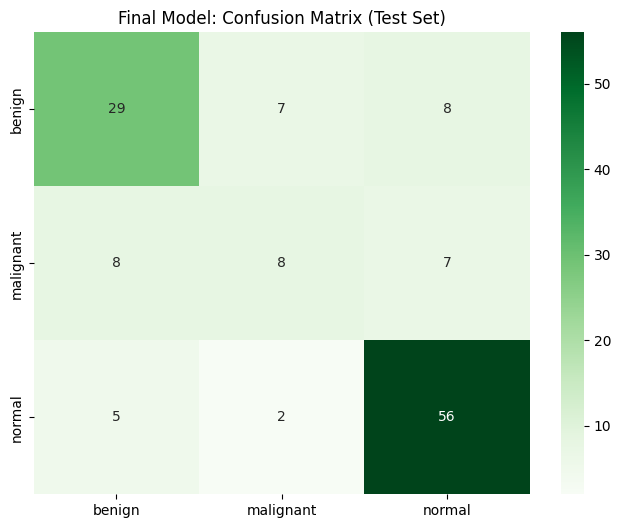

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 1. Zip'i Yerel Diske Aç (Hız için çok önemli!)
!unzip -q "/content/drive/MyDrive/Ara Proje/MEME_ULTRA_FINAL_DATASET.zip" -d /content/fast_data

# 2. Veri Yükleyiciler (Augmentation fiziksel yapıldığı için burada sadece rescale)
train_path = "/content/fast_data/content/final_dataset/train"
val_path = "/content/fast_data/content/final_dataset/val"
test_path = "/content/fast_data/content/final_dataset/test"

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# 3. Ana Modeli Yükle (DatasetA %86 olan model)
model = load_model("/content/drive/MyDrive/nasnet_source_model.keras")

# Son 30 katmanı açalım (Yeni verilere uyum sağlaması için ideal derinlik)
for layer in model.layers[:-30]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Eğitim
print("\n--- Final Fine-Tuning Başlıyor ---")
history = model.fit(train_gen, validation_data=val_gen, epochs=20)

# 5. Modeli Kaydet
model.save("/content/drive/MyDrive/Ara Proje/NASNET_FINAL_BEST_MODEL.keras")

# 6. Performans Metrikleri (İşte hocanın bakacağı yer!)
Y_pred = model.predict(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_gen.classes
labels = list(test_gen.class_indices.keys())

print("\n--- TEST SETİ DETAYLI RAPOR ---")
print(classification_report(y_true, y_pred, target_names=labels))

# Confusion Matrix Görselleştirme

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title('Final Model: Confusion Matrix (Test Set)')
plt.show()

Found 2826 images belonging to 3 classes.
Found 127 images belonging to 3 classes.
Found 130 images belonging to 3 classes.

🚀 %90 Hedefi İçin Derin Eğitim Başlıyor...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.4233 - loss: 2.5378 - val_accuracy: 0.5669 - val_loss: 1.2294 - learning_rate: 1.0000e-05
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 200ms/step - accuracy: 0.6223 - loss: 1.2272 - val_accuracy: 0.5906 - val_loss: 1.1321 - learning_rate: 1.0000e-05
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.6797 - loss: 0.9856 - val_accuracy: 0.5984 - val_loss: 1.0664 - learning_rate: 1.0000e-05
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.7095 - loss: 0.8319 - val_accuracy: 0.6220 - val_loss: 1.0352 - learning_rate: 1.0000e-05
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - accuracy: 0.7312 - loss: 0.7341 - val_accuracy: 0.6299 - val_loss: 0.9634 - learning_rate: 1.0000e-05
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 198ms/step - accuracy: 0.7644 - loss: 0.6486 - val_accuracy: 0.6457 - val_loss: 0.9401 - learning_rate: 1.0000e-05
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - accur

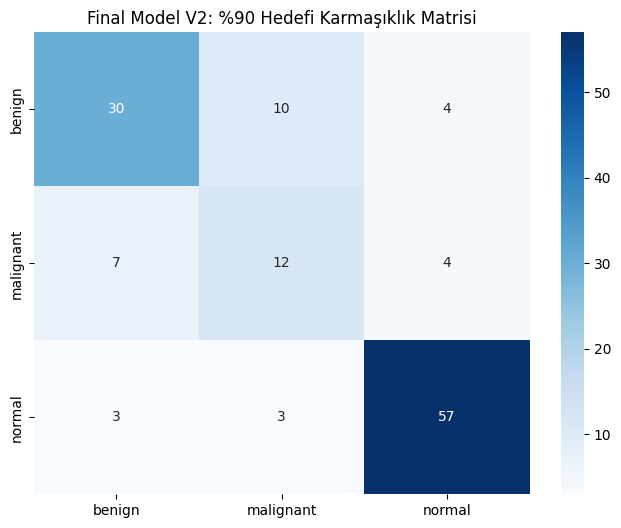

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

# 1. Zip'i Yerel Diske Aç (Overwrite modunda)
!unzip -o -q "/content/drive/MyDrive/Ara Proje/MEME_ULTRA_FINAL_DATASET.zip" -d /content/fast_data

# 2. Veri Yollarını Belirle
data_root = "/content/fast_data/content/final_dataset"
train_path = os.path.join(data_root, "train")
val_path = os.path.join(data_root, "val")
test_path = os.path.join(data_root, "test")

# 3. Veri Yükleyiciler
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# 4. Modeli Yükle ve Katman Ayarlarını Yap
# En son aldığın %72'lik modelden değil, kök modelden başlamak daha sağlıklı olabilir:
model = load_model("/content/drive/MyDrive/nasnet_source_model.keras")

# --- STRATEJİK DEĞİŞİKLİK ---
# Son 100 katmanı açıyoruz ki model daha derin özelliklere odaklansın
for layer in model.layers[:-100]:
    layer.trainable = False
for layer in model.layers[-100:]:
    layer.trainable = True

# Öğrenme oranını düşürdük (Hassas ayar için)
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy', metrics=['accuracy'])

# --- AKILLI EĞİTİM ARAÇLARI ---
# Başarı artmadığında öğrenme hızını otomatik düşürür
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)
# Eğer model kötüye gitmeye başlarsa eğitimi durdurur (Ezberlemeyi önler)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# 5. Final Fine-Tuning Başlıyor
print("\n🚀 %90 Hedefi İçin Derin Eğitim Başlıyor...")
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30, # Süreyi artırdık
    callbacks=[reduce_lr, early_stop]
)

# 6. Modeli Kaydet (V2 olarak)
model.save("/content/drive/MyDrive/Ara Proje/NASNET_V2_90_TARGET.keras")

# 7. Performans Metrikleri ve Görselleştirme
Y_pred = model.predict(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_gen.classes
labels = list(test_gen.class_indices.keys())

print("\n--- TEST SETİ DETAYLI RAPOR ---")
report = classification_report(y_true, y_pred, target_names=labels)
print(report)

# Raporu Drive'a kaydet
with open("/content/drive/MyDrive/Ara Proje/v2_90_target_report.txt", "w") as f:
    f.write(report)

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Final Model V2: %90 Hedefi Karmaşıklık Matrisi')
plt.show()

In [ ]:
# --- 8. AĞIRLIKLARI AYRICA KAYDET ---
weights_path = "/content/drive/MyDrive/Ara Proje/NASNET_V2_90_WEIGHTS.weights.h5"
model.save_weights(weights_path)

print(f"✅ Model ağırlıkları başarıyla kaydedildi: {weights_path}")

# --- 9. MODEL ÖZETİNİ (MİMARİSİ) KAYDET ---
# Ağırlıkları tek başına yüklemek istersen mimariyi bilmen gerekir.
with open("/content/drive/MyDrive/Ara Proje/model_architecture.json", "w") as f:
    f.write(model.to_json())
print("✅ Model mimarisi JSON olarak kaydedildi.")

✅ Model ağırlıkları başarıyla kaydedildi: /content/drive/MyDrive/Ara Proje/NASNET_V2_90_WEIGHTS.weights.h5
✅ Model mimarisi JSON olarak kaydedildi.
